<a href="https://colab.research.google.com/github/toz015/USTSV/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Visualization 
Given an excel, we need your use what you have learned to: 

  1. Generate a chart for weekly.  
  2. Generate crontab entries for weekly and daily scheduling.

Excel: “meeting data 3_16-3_22xls” in our homework folder. \
(NOTES: This is a version I am using to calculate a capacity planning and loadTest.sh crontab.)

Info of dataset:
    

*   Daily volume of meetings we have.
*   Webex: 1 week of data.
*   Server: Gcp: USWest, USEast, AP (singapore)  EU(frankford) 
*   4 region:  generate a scheduler to prepare our pods/nodes. 



Based on provided information. 
#### Tasks:
* Draw charts on meetings based on region: US (west, east), Asia Pacific (singapore), Europe (frankford). [choose columns to combine]
* Numpy Panda: Daily chart /weekday chart,  weekend chart. [group by] Weekly chart  
* Improve ipynb for our scheduler to generate 4 different schedules based on the chart of each region.
* Parameterize a factor (currently set at 0.6) so that we can easily change the 0.6 to another value easily.
* Can you change the ipynb to a flask microservice? 
* localhost:5000/region/time/?factor=0.6 to get the meeting number we should generate? Optional. 


In [1]:
#@title import packages
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# import dataset
link = 'https://drive.google.com/open?id=1JMG1zcZmi9mbhz-BmtV47bcOWHmIw-xp'

fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) # replace the id with id of file you want to access
file.GetContentFile('Meeting Data 3_16-3_22.xls')  
df = pd.read_excel('Meeting Data 3_16-3_22.xls', sep= ",")
df.drop(['DFW2',], axis=1, inplace = True)

In [61]:
df.tail(5)

,15 min,Date,@timestamp per 15 minutes,SJC,DFW,Total,Time,Weekday
Time,,,,,,,,
2020-03-22 22:45:00,668,2020-03-22,22:45:00,3925,4963,15358,2020-03-22 22:45:00,False
2020-03-22 23:00:00,669,2020-03-22,23:00:00,3619,4036,13573,2020-03-22 23:00:00,False
2020-03-22 23:15:00,670,2020-03-22,23:15:00,3875,4399,14295,2020-03-22 23:15:00,False
2020-03-22 23:30:00,671,2020-03-22,23:30:00,3598,4061,13572,2020-03-22 23:30:00,False
2020-03-22 23:45:00,672,2020-03-22,23:45:00,3879,5481,16363,2020-03-22 23:45:00,False


In [11]:
df["Date"] = df["Date"].astype(str)
df['@timestamp per 15 minutes'] = df['@timestamp per 15 minutes'].astype(str)
df.dtypes

15 min                        int64
Date                         object
@timestamp per 15 minutes    object
SJC                           int64
DFW                           int64
Total                         int64
dtype: object

In [12]:
df["Time"] = pd.to_datetime(df['Date'] + ' ' + df['@timestamp per 15 minutes'])

In [31]:
df["Date"] = pd.to_datetime(df["Date"])

In [32]:
def f(x):
    #x['Total']=x['Total']/100
    return x[1].weekday() < 5

In [36]:
workday = df.apply(f, axis=1)
workday.name = "Weekday"
df = df.join(workday)

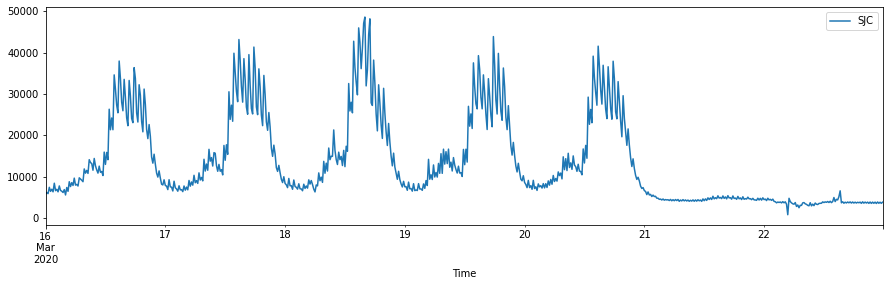

In [60]:
#@title Numpy Panda: Daily chart /weekday chart, weekend chart. [group by] Weekly chart
import matplotlib.pyplot as plt

def chart(time, df, place):
  temp = df[[place, "Time"]]
  temp.index = temp["Time"]
  temp.resample(time).mean().plot(figsize=(15,4))
  return 

# example
chart('15min', df, "SJC")


In [66]:
def f2(x):
    #x['Total']=x['Total']/100
    return x[1].weekday()
weekDay = df.apply(f2, axis=1)
weekDay.name = "weekDay"
df = df.join(weekDay)
df.head()

,15 min,Date,@timestamp per 15 minutes,SJC,DFW,Total,Time,Weekday,weekDay
Time,,,,,,,,,
2020-03-16 00:00:00,1,2020-03-16,00:00:00,5835,2765,12434,2020-03-16 00:00:00,True,0
2020-03-16 00:15:00,2,2020-03-16,00:15:00,6226,2989,13207,2020-03-16 00:15:00,True,0
2020-03-16 00:30:00,3,2020-03-16,00:30:00,5940,2595,12398,2020-03-16 00:30:00,True,0
2020-03-16 00:45:00,4,2020-03-16,00:45:00,7470,3548,15471,2020-03-16 00:45:00,True,0
2020-03-16 01:00:00,5,2020-03-16,01:00:00,6496,2838,13214,2020-03-16 01:00:00,True,0


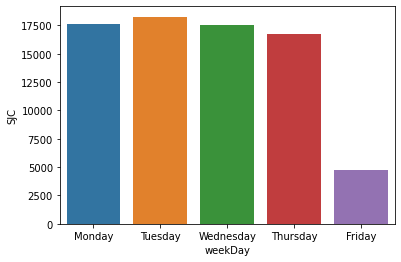

In [93]:
#@title Weekly chart
import seaborn as sns
sns.barplot(data=df_week[(df_week["weekDay"] != 0) & (df_week["weekDay"] != 6) ], x="weekDay", y ="SJC")
plt.xticks(np.arange(5), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
# Show graphic
plt.show()
